In [94]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
#Import packages
import pandas as pd 
import numpy as np
import re
import collections
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

In [95]:
df = pd.read_csv('https://github.com/Ntacyica/bitweeter9/raw/main/bittweets-9.csv')

In [96]:
df.head()

,user,fullname,timestamp,replies,likes,retweets,text
0,Cryptogeeks,Cryptogeeks,2018-01-24 22:58:09+00,1,1,0,Bitcoin: For Those Looking For An Alternate Wa...
1,Bitty_Bot,BittyBot,2018-01-24 22:06:35+00,0,0,0,Try fatguyslim at https://LocalBitcoins.com/ad...
2,coin_choice,CoinChoice-ビットコイン・仮想通貨ニュース,2018-01-24 22:00:02+00,0,0,0,"おはようございます！2018-01-25 08:00現在のレート情報♪\nBTC：1,218..."
3,incoinsbot,InCoins,2018-01-24 21:21:06+00,0,0,0,#CryptoMarkets top 10 price update 1h \n \n$BT...
4,cryptopricesaaa,crypto bot,2018-01-24 21:00:07+00,0,0,0,2018-01-24 22:00:07 UTC\n\nBTC: $11259.23\nBCH...


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30418 entries, 0 to 30417
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user       30418 non-null  object
 1   fullname   30418 non-null  object
 2   timestamp  30418 non-null  object
 3   replies    30418 non-null  int64 
 4   likes      30418 non-null  int64 
 5   retweets   30418 non-null  int64 
 6   text       30418 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.6+ MB


In [98]:
df.isnull().sum()

user         0
fullname     0
timestamp    0
replies      0
likes        0
retweets     0
text         0
dtype: int64

In [99]:
def unique_values(data):
    total = df.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in df.columns:
        unique = df[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [100]:
unique_values(df)

,user,fullname,timestamp,replies,likes,retweets,text
Total,30418,30418,30418,30418,30418,30418,30418
Uniques,3137,3123,25122,32,72,43,29222


In [101]:
#subset the df for NLP
df_nlp = df.filter(['text'], axis =1) 
df_nlp.head()

,text
0,Bitcoin: For Those Looking For An Alternate Wa...
1,Try fatguyslim at https://LocalBitcoins.com/ad...
2,"おはようございます！2018-01-25 08:00現在のレート情報♪\nBTC：1,218..."
3,#CryptoMarkets top 10 price update 1h \n \n$BT...
4,2018-01-24 22:00:07 UTC\n\nBTC: $11259.23\nBCH...


In [102]:
#install the preprocessor
!pip install tweet-preprocessor -qq
import preprocessor as p

In [103]:
#set options for text cleaning
p.set_options(p.OPT.RESERVED, p.OPT.EMOJI, p.OPT.MENTION, p.OPT.SMILEY, p.OPT.URL, p.OPT.MENTION, p.OPT.HASHTAG, p.OPT.NUMBER)

In [104]:
#in order to apply p.clean, replace NaN values with a space
df_nlp['text'] = df_nlp['text'].fillna(' ').apply(str)

In [105]:
#clean text
df_nlp['cleaned'] = df['text'].map(p.clean)
df_nlp.head()

,text,cleaned
0,Bitcoin: For Those Looking For An Alternate Wa...,Bitcoin: For Those Looking For An Alternate Wa...
1,Try fatguyslim at https://LocalBitcoins.com/ad...,Try fatguyslim at only per BTC. (BPI +3.06%)
2,"おはようございます！2018-01-25 08:00現在のレート情報♪\nBTC：1,218...","-01-25 :00 BTC1,218,645 (-2%) ETH113,337 (-1.4..."
3,#CryptoMarkets top 10 price update 1h \n \n$BT...,top price update h $BTC $11289.60 % $ETH $1043...
4,2018-01-24 22:00:07 UTC\n\nBTC: $11259.23\nBCH...,-01-24 :00:07 UTC BTC: $11259.23 BCH: $1642.68...


In [106]:
#lowercase tweets
df_nlp['cleaned'] = df_nlp['cleaned'].str.lower()

In [107]:
#import regular expression operations
import re

In [108]:
def decontract(phrase):
    # specific contractions
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"dat","that", phrase)
    phrase = re.sub(r"dats","that is", phrase)

    # general contractions
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [109]:
# apply function to cleaned tweets
df_nlp['cleaned'] = df_nlp['cleaned'].map(decontract)

In [110]:
#load stop words
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [111]:
#add extra stopwords
stop_words = stopwords.words('english')[:]
stop_words.extend(["rt", "us"])

In [112]:
#check stop_words
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [113]:
#load TweetTokenizer
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

In [114]:
#remove stopwords and tokenize
df_nlp['tokens'] = df['cleaned'].map(lambda row: [tok.lower() for tok in tknzr.tokenize(row) if tok not in stop_words and tok.isalpha()])
df_nlp.head()

KeyError: ignored

In [70]:
#import gensim
import gensim

In [71]:
#stemmer
from gensim.parsing.porter import PorterStemmer
stem = PorterStemmer() 

df_nlp['text_stem'] = stem.stem_documents(df['text_clean']) 
df_nlp.head()

KeyError: ignored

In [38]:
#add the tokens column to the original df for future ML purposes
df['tokens'] = df_nlp['tokens']
df.head()

,text,text_clean,tokens,text_stem
0,Bitcoin: For Those Looking For An Alternate Wa...,bitcoin: for those looking for an alternate wa...,"[bitcoin, looking, alternate, way, invest, bit...",bitcoin: for those look for an altern wai to i...
1,Try fatguyslim at https://LocalBitcoins.com/ad...,try fatguyslim at only per btc. (bpi +3.06%),"[try, fatguyslim, per, btc, bpi]",try fatguyslim at onli per btc. (bpi +3.06%)
2,"おはようございます！2018-01-25 08:00現在のレート情報♪\nBTC：1,218...","-01-25 :00 btc1,218,645 (-2%) eth113,337 (-1.4...","[btc, eth, bch, xrp, ltc]","-01-25 :00 btc1,218,645 (-2%) eth113,337 (-1.4..."
3,#CryptoMarkets top 10 price update 1h \n \n$BT...,top price upthate h $btc $11289.60 % $eth $104...,"[top, price, upthate, h, btc, eth, xrp, bch, a...",top price upthat h $btc $11289.60 % $eth $1043...
4,2018-01-24 22:00:07 UTC\n\nBTC: $11259.23\nBCH...,-01-24 :00:07 utc btc: $11259.23 bch: $1642.68...,"[utc, btc, bch, eth, zec, ltc, etc, xrp]",-01-24 :00:07 utc btc: $11259.23 bch: $1642.68...


In [9]:
!pip install tweet-preprocessor -qq

In [ ]:
# Packages for data preparation
import preprocessor as p
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [ ]:
p.set_options(p.OPT.URL, p.OPT.RESERVED, p.OPT.EMOJI, p.OPT.SMILEY, p.OPT.MENTION)

In [ ]:
df['clean_text'] = df['text'].map(p.clean)

In [ ]:
df.head()

,user,fullname,timestamp,replies,likes,retweets,text,clean_text
0,Cryptogeeks,Cryptogeeks,2018-01-24 22:58:09+00,1,1,0,Bitcoin: For Those Looking For An Alternate Wa...,Bitcoin: For Those Looking For An Alternate Wa...
1,Bitty_Bot,BittyBot,2018-01-24 22:06:35+00,0,0,0,Try fatguyslim at https://LocalBitcoins.com/ad...,"Try fatguyslim at only 8,074.00 per BTC. (BPI ..."
2,coin_choice,CoinChoice-ビットコイン・仮想通貨ニュース,2018-01-24 22:00:02+00,0,0,0,"おはようございます！2018-01-25 08:00現在のレート情報♪\nBTC：1,218...","2018-01-25 08:00 BTC1,218,645 (-2%) ETH113,337..."
3,incoinsbot,InCoins,2018-01-24 21:21:06+00,0,0,0,#CryptoMarkets top 10 price update 1h \n \n$BT...,#CryptoMarkets top 10 price update 1h $BTC $11...
4,cryptopricesaaa,crypto bot,2018-01-24 21:00:07+00,0,0,0,2018-01-24 22:00:07 UTC\n\nBTC: $11259.23\nBCH...,2018-01-24 22:00:07 UTC BTC: $11259.23 BCH: $1...


In [ ]:

df['timestamp'] = pd.to_datetime(df['timestamp'])                # convert to date/time

df.head()

,user,fullname,timestamp,replies,likes,retweets,text,clean_text
0,Cryptogeeks,Cryptogeeks,2018-01-24 22:58:09+00:00,1,1,0,Bitcoin: For Those Looking For An Alternate Wa...,Bitcoin: For Those Looking For An Alternate Wa...
1,Bitty_Bot,BittyBot,2018-01-24 22:06:35+00:00,0,0,0,Try fatguyslim at https://LocalBitcoins.com/ad...,"Try fatguyslim at only 8,074.00 per BTC. (BPI ..."
2,coin_choice,CoinChoice-ビットコイン・仮想通貨ニュース,2018-01-24 22:00:02+00:00,0,0,0,"おはようございます！2018-01-25 08:00現在のレート情報♪\nBTC：1,218...","2018-01-25 08:00 BTC1,218,645 (-2%) ETH113,337..."
3,incoinsbot,InCoins,2018-01-24 21:21:06+00:00,0,0,0,#CryptoMarkets top 10 price update 1h \n \n$BT...,#CryptoMarkets top 10 price update 1h $BTC $11...
4,cryptopricesaaa,crypto bot,2018-01-24 21:00:07+00:00,0,0,0,2018-01-24 22:00:07 UTC\n\nBTC: $11259.23\nBCH...,2018-01-24 22:00:07 UTC BTC: $11259.23 BCH: $1...


In [ ]:
df.sort_values(by='timestamp', inplace=True)        # resort the DF based on date time (oldest=first)
df.reset_index(drop=True, inplace=True)
df.head()

,user,fullname,timestamp,replies,likes,retweets,text,clean_text
0,GimchiPremium,James Kim,2018-01-17 23:00:01+00:00,0,0,0,Current rate of #KoreanPremium\nBTC: 24.53% (K...,Current rate of #KoreanPremium BTC: 24.53% (KR...
1,coinstats,Coinstats,2018-01-17 23:00:02+00:00,0,0,0,"Bitcoin - BTC\nPrice: $11,269.80\nChange in 1h...","Bitcoin - BTC Price: $11,269.80 Change in 1h: ..."
2,thirdbrainfx,ThirdBrainFx,2018-01-17 23:00:02+00:00,0,0,1,"On market #Exmo ,#DASH to #BTC rate is 0.07037...","On market #Exmo ,#DASH to #BTC rate is 0.07037..."
3,c_coins2017,KryptCoins@最新価格つぶやく,2018-01-17 23:00:02+00:00,0,0,0,"BTC最新価格 : 1,295,518.00 円( 2018-01-18 08:59:57...","BTC : 1,295,518.00 ( 2018-01-18 08:59:57 ) # #..."
4,crypto_paraguay,Crypto Paraguay,2018-01-17 23:00:02+00:00,0,1,0,Cotizaciones al 17/01/2018 09:00 PM\nBitcoin (...,Cotizaciones al 17/01/2018 09:00 PM Bitcoin (B...


In [ ]:
df = df['text']    # the 'text' column, containing the tweets

In [ ]:
from textblob import TextBlob

In [ ]:
def calc_sentiment(txt):
    blob = TextBlob(txt)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

df_sentiments = df.apply(calc_sentiment)               # calc sentiment polarity & subjectivity, return in a Series of tuples
df_polarity = df_sentiments.apply(lambda x: x[0])      # new column of polarity
df_subjectivity = df_sentiments.apply(lambda x: x[1])  # new column of subjectivity

df['polarity'], df['subjectivity'] = df_polarity, df_subjectivity  # create the series

df.sample(5)        # display 10 random rows

24271    2018/02/11 00:00\n#Binance 格安コイン\n\n1位 #IOST 0...
13218    #Bitcoin  -1.04% \nUltima: R$ 32550.00  Alta: ...
2980     BTC/USD touché à hier haut à 11474.2 [00:02 GM...
29755    2018/02/17 06:00\n#BTC 1029994.5円\n#ETH 96186....
27661    BTC Price: 9300.00$, \nBTC Today High : 9327.7...
Name: text, dtype: object

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

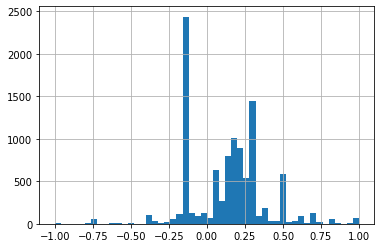

In [ ]:
df.polarity.loc[df.polarity != 0.0].hist(bins=50)   # histogram of polarity (excluding those with neutral sentiment)

In [ ]:
# More advanced way of tokenizing
#import spacy
#nlp = spacy.load("en")
#tokens = []
#for tweet in nlp.pipe(congress_tweets['text']):
# tweet_tok = [token.lemma_.lower() for token in tweet if token.pos_ in ['NOUN', 'PROPN'
, 'VERB', 'ADJ', 'ADV'] and not token.is_stop]
# tokens.append(tweet_tok)

("'VERB',", "'ADJ',", "'ADV']", 'and', 'not', 'token.is_stop]')

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
stop_words = set(stopwords.words('english'))
tknzr = TweetTokenizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from wordcloud import WordCloud, STOPWORDS